# Extracting Sentences

Sometimes we want to train a model only with sentences to make sentence representation. To do that, we convert the training and dev dataset's sentences from context and questions in a separate file. 

In [2]:
import os
import json


def get_sentence_spans(context):
    from nltk.data import load
    tokenizer = load('tokenizers/punkt/{0}.pickle'.format('english'))
    sentence_span = tokenizer.span_tokenize(context)
    return sentence_span

def get_sentence_index(answer_span, sentence_spans):
    """
    return the sentence index. It returns -1 if the answer span could not be found on a single sentence. 
    """
    idx = -1
    for sent_idx, sent_span in enumerate(sentence_spans):
        if sent_span[0] <= answer_span[0] and answer_span[1] <=sent_span[1]+1:
            idx = sent_idx
            break
    return idx




work_dir = os.path.join("..", "data")
dev_filenames = {'dev': "dev-v1.1.json", 'train': "train-v1.1.json"}

for key, filename in dev_filenames.items():
    with open(os.path.join(work_dir, filename)) as data_file:    
        filedata = json.load(data_file)


    print("%s datafile info:" % (key))
    print("\tversion:", filedata["version"])
    print()

    data = filedata["data"]

    sentences_context = []
    sentences_question = []
    for article in data:
        title = article["title"]
        # print(title)
        paragraphs = article["paragraphs"]
        for paragraph in paragraphs:
            context = paragraph["context"]
            spans = get_sentence_spans(context)

            # print context sentence by sentence
            for idx, sent_span in enumerate(spans):
                sentences_context.append(context[sent_span[0]:sent_span[1]+1])
                sentences_context[-1] = sentences_context[-1].replace('\n', ' ').strip()


            qas = paragraph["qas"]
            for qa in qas:
                id = qa["id"]
                question = qa["question"]
                answers = qa["answers"]

                sentences_question.append(question)
                sentences_question[-1] = sentences_question[-1].replace('\n', ' ').strip()

    print("total number of sentences extracted from context:", len(sentences_context))
    print("total number of sentences extracted from question:", len(sentences_question))
    
    with open("sentences_context_%s.txt"%(key), "w",encoding='utf-8') as f:
        for sent in sentences_context:
            f.write("%s\t%s\tneutral\n"%(sent, sent))
        
    with open("sentences_question_%s.txt"%(key), "w",encoding='utf-8') as f:
        for sent in sentences_question:
            f.write("%s\t%s\tneutral\n"%(sent, sent))

    with open("sentences_all_%s.txt"%(key), "w",encoding='utf-8') as f:
        for sent in sentences_context + sentences_question:
            f.write("%s\t%s\tneutral\n"%(sent, sent))

    sentences_question[:5]    

dev datafile info:
	version: 1.1

total number of sentences extracted from context: 10458
total number of sentences extracted from question: 10570
train datafile info:
	version: 1.1

total number of sentences extracted from context: 93595
total number of sentences extracted from question: 87599


## Convert in into encoder decoder format

Create a file that contains 3 tab separated entity.

sentence1 sentence2 dummy_label

In [13]:
n

# Statistics on the sentences

In [14]:
count_dict = {}
total = len(sentences_question)
for sent in sentences_question:
    if len(sent) in count_dict:
        count_dict[len(sent)] += 1
    else:
        count_dict[len(sent)] = 1
    
        
        
info = zip(list(count_dict.keys()), list(count_dict.values()))
# print(list(info))

th = 0.95
cut_off_value = None
accum = 0
for l, count in info:
    accum += count
    if(accum >= total * th):
        cut_off_value = l
        break
        
print("length smaller then or equals to %d contains %.2f of whole data"%(cut_off_value, th))


    

length smaller then or equals to 98 contains 0.95 of whole data


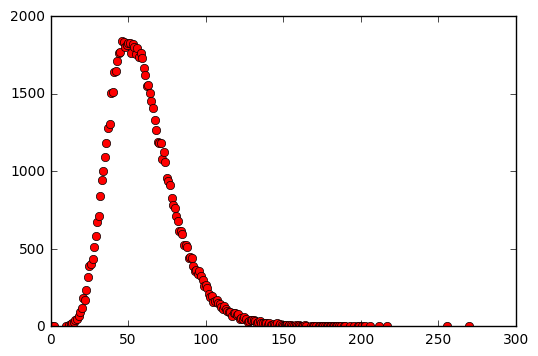

In [15]:

import matplotlib.pyplot as plt
plt.plot(list(count_dict.keys()), list(count_dict.values()), 'ro')
# plt.axis([0, 6, 0, 20])
plt.show()